In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('cleaned_data.csv', encoding='latin-1')
df

,COUNTY,CASE_TYPE,STATUS,STATUS_DATE,CLAIM_STATUS,POTENTIAL_CONTAMINANTS_OF_CONCERN,QUANTITY_RELEASED_GALLONS,POTENTIAL_MEDIA_OF_CONCERN,BEGIN_DATE,LEAK_REPORTED_DATE,HOW_DISCOVERED,DISCHARGE_SOURCE,NO_FURTHER_ACTION_DATE,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,RWQCB_REGION
0,Monterey,Military Cleanup Site,Open - Long Term Management,2022-04-01,NaN,"Other Solvent or Non-Petroleum Hydrocarbon, Ot...",0.0,"Aquifer used for drinking water supply, Soil, ...",2009-05-11,NaN,NaN,NaN,NaN,NaN,41-45%,45-50%,Yes,CENTRAL COAST RWQCB (REGION 3)
1,Sonoma,Cleanup Program Site,Open - Remediation,2023-02-28,NaN,"Asphalt, Diesel, Heating Oil / Fuel Oil, Keros...",0.0,Soil,2019-03-06,NaN,NaN,NaN,NaN,NaN,21-25%,20-25%,No,NORTH COAST RWQCB (REGION 1)
2,San Luis Obispo,* NPDES,Active,2024-09-01,NaN,NaN,0.0,NaN,2014-12-01,NaN,NaN,NaN,NaN,NaN,16-20%,35-40%,No,CENTRAL COAST RWQCB (REGION 3)
3,Merced,LUST Cleanup Site,Open - Site Assessment,2006-02-28,"Ineligible, Active, Ineligible, Ineligible","Gasoline, Heating Oil / Fuel Oil",0.0,Under Investigation,2006-02-28,2006-02-28T00:00:00Z,Site Assessment/Site Investigation,Other,NaN,Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,CENTRAL VALLEY RWQCB (REGION 5F)
4,Santa Clara,Cleanup Program Site,Open - Site Assessment,2014-12-08,NaN,"Trichloroethylene (TCE), DDD / DDE / DDT",0.0,"Soil, Soil Vapor",2014-11-03,2014-11-03T00:00:00Z,Site Assessment/Site Investigation,NaN,NaN,NaN,36-40%,35-40%,No,SAN FRANCISCO BAY RWQCB (REGION 2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75058,Stanislaus,Cleanup Program Site,Open - Inactive,1998-03-28,NaN,NaN,0.0,"Soil, Under Investigation",1998-03-27,1965-01-02T00:00:00Z,NaN,NaN,NaN,Disadvantaged Community,81-85%,60-65%,No,CENTRAL VALLEY RWQCB (REGION 5S)
75059,San Diego,Military Cleanup Site,Completed - Case Closed,1999-03-31,NaN,NaN,0.0,NaN,1999-03-31,NaN,NaN,Other,1999-03-31T00:00:00Z,NaN,26-30%,45-50%,Yes,SAN DIEGO RWQCB (REGION 9)
75060,Mendocino,LUST Cleanup Site,Completed - Case Closed,2013-03-18,NaN,NaN,0.0,Under Investigation,1998-07-06,1998-07-06T00:00:00Z,Other Means,NaN,2013-03-18T00:00:00Z,NaN,16-20%,10-15%,No,NORTH COAST RWQCB (REGION 1)
75061,San Diego,Military UST Site,Completed - Case Closed,2009-04-01,NaN,"Diesel, Heating Oil / Fuel Oil",0.0,Soil,2007-07-29,2008-04-17T00:00:00Z,Tank Closure,"Piping, Tank",2009-04-01T00:00:00Z,NaN,26-30%,55-60%,Yes,SAN DIEGO RWQCB (REGION 9)


In [6]:
df['discovery_to_case_open_days'] = (df['BEGIN_DATE'] - df['LEAK_REPORTED_DATE']).dt.days
df['discovery_to_case_open_days']

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [7]:
df['LEAK_REPORTED_DATE'] = pd.to_datetime(df['LEAK_REPORTED_DATE']).dt.strftime('%Y-%m-%d')

In [8]:
df['LEAK_REPORTED_DATE']

,LEAK_REPORTED_DATE
0,NaN
1,NaN
2,NaN
3,2006-02-28
4,2014-11-03
...,...
75058,1965-01-02
75059,NaN
75060,1998-07-06
75061,2008-04-17


In [9]:
df = df.dropna(subset=['LEAK_REPORTED_DATE'])
df

,COUNTY,CASE_TYPE,STATUS,STATUS_DATE,CLAIM_STATUS,POTENTIAL_CONTAMINANTS_OF_CONCERN,QUANTITY_RELEASED_GALLONS,POTENTIAL_MEDIA_OF_CONCERN,BEGIN_DATE,LEAK_REPORTED_DATE,HOW_DISCOVERED,DISCHARGE_SOURCE,NO_FURTHER_ACTION_DATE,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,RWQCB_REGION
3,Merced,LUST Cleanup Site,Open - Site Assessment,2006-02-28,"Ineligible, Active, Ineligible, Ineligible","Gasoline, Heating Oil / Fuel Oil",0.0,Under Investigation,2006-02-28,2006-02-28,Site Assessment/Site Investigation,Other,NaN,Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,CENTRAL VALLEY RWQCB (REGION 5F)
4,Santa Clara,Cleanup Program Site,Open - Site Assessment,2014-12-08,NaN,"Trichloroethylene (TCE), DDD / DDE / DDT",0.0,"Soil, Soil Vapor",2014-11-03,2014-11-03,Site Assessment/Site Investigation,NaN,NaN,NaN,36-40%,35-40%,No,SAN FRANCISCO BAY RWQCB (REGION 2)
8,Los Angeles,Cleanup Program Site,Open - Site Assessment,2023-05-04,NaN,"Tetrachloroethylene (PCE), Trichloroethylene (...",0.0,"Aquifer used for drinking water supply, Indoor...",2001-04-01,1965-01-02,NaN,NaN,NaN,NaN,66-70%,70-75%,No,LOS ANGELES RWQCB (REGION 4)
24,Sonoma,Cleanup Program Site,Open - Assessment & Interim Remedial Action,2017-06-13,NaN,Trichloroethylene (TCE),0.0,Aquifer used for drinking water supply,2007-03-30,2007-04-04,NaN,NaN,NaN,NaN,21-25%,15-20%,No,NORTH COAST RWQCB (REGION 1)
29,Orange,Cleanup Program Site,Open - Assessment & Interim Remedial Action,2011-01-18,NaN,"Tetrachloroethylene (PCE), Trichloroethylene (...",0.0,"Aquifer used for drinking water supply, Soil",1991-01-30,1991-04-30,* Other Means,NaN,NaN,Disadvantaged Community,86-90%,85-90%,No,SANTA ANA RWQCB (REGION 8)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75057,San Benito,LUST Cleanup Site,Completed - Case Closed,1998-12-16,NaN,Gasoline,0.0,Under Investigation,1990-09-11,1990-09-11,Other Means,Other,1998-12-16T00:00:00Z,NaN,51-55%,65-70%,No,CENTRAL COAST RWQCB (REGION 3)
75058,Stanislaus,Cleanup Program Site,Open - Inactive,1998-03-28,NaN,NaN,0.0,"Soil, Under Investigation",1998-03-27,1965-01-02,NaN,NaN,NaN,Disadvantaged Community,81-85%,60-65%,No,CENTRAL VALLEY RWQCB (REGION 5S)
75060,Mendocino,LUST Cleanup Site,Completed - Case Closed,2013-03-18,NaN,NaN,0.0,Under Investigation,1998-07-06,1998-07-06,Other Means,NaN,2013-03-18T00:00:00Z,NaN,16-20%,10-15%,No,NORTH COAST RWQCB (REGION 1)
75061,San Diego,Military UST Site,Completed - Case Closed,2009-04-01,NaN,"Diesel, Heating Oil / Fuel Oil",0.0,Soil,2007-07-29,2008-04-17,Tank Closure,"Piping, Tank",2009-04-01T00:00:00Z,NaN,26-30%,55-60%,Yes,SAN DIEGO RWQCB (REGION 9)


In [10]:
df[['BEGIN_DATE','LEAK_REPORTED_DATE']]

,BEGIN_DATE,LEAK_REPORTED_DATE
3,2006-02-28,2006-02-28
4,2014-11-03,2014-11-03
8,2001-04-01,1965-01-02
24,2007-03-30,2007-04-04
29,1991-01-30,1991-04-30
...,...,...
75057,1990-09-11,1990-09-11
75058,1998-03-27,1965-01-02
75060,1998-07-06,1998-07-06
75061,2007-07-29,2008-04-17


In [11]:
df['LEAK_REPORTED_DATE'] = pd.to_datetime(df['LEAK_REPORTED_DATE'])
df['LEAK_REPORTED_DATE']

/tmp/ipython-input-1971775035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LEAK_REPORTED_DATE'] = pd.to_datetime(df['LEAK_REPORTED_DATE'])


,LEAK_REPORTED_DATE
3,2006-02-28
4,2014-11-03
8,1965-01-02
24,2007-04-04
29,1991-04-30
...,...
75057,1990-09-11
75058,1965-01-02
75060,1998-07-06
75061,2008-04-17


In [12]:
df = df.dropna(subset=['BEGIN_DATE'])
df

,COUNTY,CASE_TYPE,STATUS,STATUS_DATE,CLAIM_STATUS,POTENTIAL_CONTAMINANTS_OF_CONCERN,QUANTITY_RELEASED_GALLONS,POTENTIAL_MEDIA_OF_CONCERN,BEGIN_DATE,LEAK_REPORTED_DATE,HOW_DISCOVERED,DISCHARGE_SOURCE,NO_FURTHER_ACTION_DATE,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,RWQCB_REGION
3,Merced,LUST Cleanup Site,Open - Site Assessment,2006-02-28,"Ineligible, Active, Ineligible, Ineligible","Gasoline, Heating Oil / Fuel Oil",0.0,Under Investigation,2006-02-28,2006-02-28,Site Assessment/Site Investigation,Other,NaN,Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,CENTRAL VALLEY RWQCB (REGION 5F)
4,Santa Clara,Cleanup Program Site,Open - Site Assessment,2014-12-08,NaN,"Trichloroethylene (TCE), DDD / DDE / DDT",0.0,"Soil, Soil Vapor",2014-11-03,2014-11-03,Site Assessment/Site Investigation,NaN,NaN,NaN,36-40%,35-40%,No,SAN FRANCISCO BAY RWQCB (REGION 2)
8,Los Angeles,Cleanup Program Site,Open - Site Assessment,2023-05-04,NaN,"Tetrachloroethylene (PCE), Trichloroethylene (...",0.0,"Aquifer used for drinking water supply, Indoor...",2001-04-01,1965-01-02,NaN,NaN,NaN,NaN,66-70%,70-75%,No,LOS ANGELES RWQCB (REGION 4)
24,Sonoma,Cleanup Program Site,Open - Assessment & Interim Remedial Action,2017-06-13,NaN,Trichloroethylene (TCE),0.0,Aquifer used for drinking water supply,2007-03-30,2007-04-04,NaN,NaN,NaN,NaN,21-25%,15-20%,No,NORTH COAST RWQCB (REGION 1)
29,Orange,Cleanup Program Site,Open - Assessment & Interim Remedial Action,2011-01-18,NaN,"Tetrachloroethylene (PCE), Trichloroethylene (...",0.0,"Aquifer used for drinking water supply, Soil",1991-01-30,1991-04-30,* Other Means,NaN,NaN,Disadvantaged Community,86-90%,85-90%,No,SANTA ANA RWQCB (REGION 8)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75057,San Benito,LUST Cleanup Site,Completed - Case Closed,1998-12-16,NaN,Gasoline,0.0,Under Investigation,1990-09-11,1990-09-11,Other Means,Other,1998-12-16T00:00:00Z,NaN,51-55%,65-70%,No,CENTRAL COAST RWQCB (REGION 3)
75058,Stanislaus,Cleanup Program Site,Open - Inactive,1998-03-28,NaN,NaN,0.0,"Soil, Under Investigation",1998-03-27,1965-01-02,NaN,NaN,NaN,Disadvantaged Community,81-85%,60-65%,No,CENTRAL VALLEY RWQCB (REGION 5S)
75060,Mendocino,LUST Cleanup Site,Completed - Case Closed,2013-03-18,NaN,NaN,0.0,Under Investigation,1998-07-06,1998-07-06,Other Means,NaN,2013-03-18T00:00:00Z,NaN,16-20%,10-15%,No,NORTH COAST RWQCB (REGION 1)
75061,San Diego,Military UST Site,Completed - Case Closed,2009-04-01,NaN,"Diesel, Heating Oil / Fuel Oil",0.0,Soil,2007-07-29,2008-04-17,Tank Closure,"Piping, Tank",2009-04-01T00:00:00Z,NaN,26-30%,55-60%,Yes,SAN DIEGO RWQCB (REGION 9)


In [13]:
df['BEGIN_DATE'] = pd.to_datetime(df['BEGIN_DATE'])
df['BEGIN_DATE']

/tmp/ipython-input-3529653108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BEGIN_DATE'] = pd.to_datetime(df['BEGIN_DATE'])


,BEGIN_DATE
3,2006-02-28
4,2014-11-03
8,2001-04-01
24,2007-03-30
29,1991-01-30
...,...
75057,1990-09-11
75058,1998-03-27
75060,1998-07-06
75061,2007-07-29


In [14]:
df

,COUNTY,CASE_TYPE,STATUS,STATUS_DATE,CLAIM_STATUS,POTENTIAL_CONTAMINANTS_OF_CONCERN,QUANTITY_RELEASED_GALLONS,POTENTIAL_MEDIA_OF_CONCERN,BEGIN_DATE,LEAK_REPORTED_DATE,HOW_DISCOVERED,DISCHARGE_SOURCE,NO_FURTHER_ACTION_DATE,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,RWQCB_REGION
3,Merced,LUST Cleanup Site,Open - Site Assessment,2006-02-28,"Ineligible, Active, Ineligible, Ineligible","Gasoline, Heating Oil / Fuel Oil",0.0,Under Investigation,2006-02-28,2006-02-28,Site Assessment/Site Investigation,Other,NaN,Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,CENTRAL VALLEY RWQCB (REGION 5F)
4,Santa Clara,Cleanup Program Site,Open - Site Assessment,2014-12-08,NaN,"Trichloroethylene (TCE), DDD / DDE / DDT",0.0,"Soil, Soil Vapor",2014-11-03,2014-11-03,Site Assessment/Site Investigation,NaN,NaN,NaN,36-40%,35-40%,No,SAN FRANCISCO BAY RWQCB (REGION 2)
8,Los Angeles,Cleanup Program Site,Open - Site Assessment,2023-05-04,NaN,"Tetrachloroethylene (PCE), Trichloroethylene (...",0.0,"Aquifer used for drinking water supply, Indoor...",2001-04-01,1965-01-02,NaN,NaN,NaN,NaN,66-70%,70-75%,No,LOS ANGELES RWQCB (REGION 4)
24,Sonoma,Cleanup Program Site,Open - Assessment & Interim Remedial Action,2017-06-13,NaN,Trichloroethylene (TCE),0.0,Aquifer used for drinking water supply,2007-03-30,2007-04-04,NaN,NaN,NaN,NaN,21-25%,15-20%,No,NORTH COAST RWQCB (REGION 1)
29,Orange,Cleanup Program Site,Open - Assessment & Interim Remedial Action,2011-01-18,NaN,"Tetrachloroethylene (PCE), Trichloroethylene (...",0.0,"Aquifer used for drinking water supply, Soil",1991-01-30,1991-04-30,* Other Means,NaN,NaN,Disadvantaged Community,86-90%,85-90%,No,SANTA ANA RWQCB (REGION 8)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75057,San Benito,LUST Cleanup Site,Completed - Case Closed,1998-12-16,NaN,Gasoline,0.0,Under Investigation,1990-09-11,1990-09-11,Other Means,Other,1998-12-16T00:00:00Z,NaN,51-55%,65-70%,No,CENTRAL COAST RWQCB (REGION 3)
75058,Stanislaus,Cleanup Program Site,Open - Inactive,1998-03-28,NaN,NaN,0.0,"Soil, Under Investigation",1998-03-27,1965-01-02,NaN,NaN,NaN,Disadvantaged Community,81-85%,60-65%,No,CENTRAL VALLEY RWQCB (REGION 5S)
75060,Mendocino,LUST Cleanup Site,Completed - Case Closed,2013-03-18,NaN,NaN,0.0,Under Investigation,1998-07-06,1998-07-06,Other Means,NaN,2013-03-18T00:00:00Z,NaN,16-20%,10-15%,No,NORTH COAST RWQCB (REGION 1)
75061,San Diego,Military UST Site,Completed - Case Closed,2009-04-01,NaN,"Diesel, Heating Oil / Fuel Oil",0.0,Soil,2007-07-29,2008-04-17,Tank Closure,"Piping, Tank",2009-04-01T00:00:00Z,NaN,26-30%,55-60%,Yes,SAN DIEGO RWQCB (REGION 9)


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

sns.barplot(LEAK_REPORTED_DATE, y ='LEAK_REPORTED_DATE',x='BEGIN_DATE')
plt.xticks(rotation=90);

In [16]:
df['discovery_to_case_open_days'] = (df['BEGIN_DATE'] - df['LEAK_REPORTED_DATE']).dt.days
df['discovery_to_case_open_days']

/tmp/ipython-input-3921150604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discovery_to_case_open_days'] = (df['BEGIN_DATE'] - df['LEAK_REPORTED_DATE']).dt.days


,discovery_to_case_open_days
3,0
4,0
8,13238
24,-5
29,-90
...,...
75057,0
75058,12137
75060,0
75061,-263


In [34]:
#average
avg_delay_by_year= df['discovery_to_case_open_days'].mean()


In [44]:
df['discovery_decade'] = (df['LEAK_REPORTED_DATE'].dt.year // 10) * 10
#df['discovery_year'] = df['LEAK_REPORTED_DATE'].dt.year
avg_delay_by_year= df.groupby('discovery_decade')['discovery_to_case_open_days'].mean()
avg_delay_by_year

/tmp/ipython-input-1322316084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discovery_decade'] = (df['LEAK_REPORTED_DATE'].dt.year // 10) * 10


,discovery_to_case_open_days
discovery_decade,
1920,26298.000000
1940,24387.571429
1950,17906.428571
1960,10998.248250
1970,727.357143
1980,-36.923307
1990,-193.255985
2000,-441.548631
2010,-706.942112


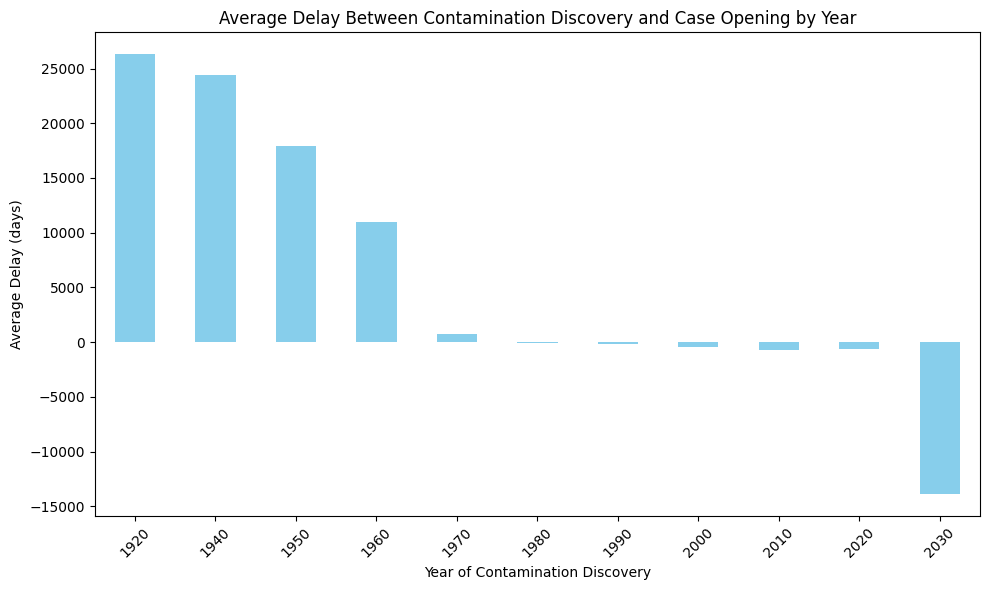

In [45]:
plt.figure(figsize=(10,6))
avg_delay_by_year.plot(kind='bar', color='skyblue')
plt.title('Average Delay Between Contamination Discovery and Case Opening by Year')
plt.xlabel('Year of Contamination Discovery')
plt.ylabel('Average Delay (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#Minimum
min_df = df['discovery_to_case_open_days'].sort_values().head(5)
min_df/365


,discovery_to_case_open_days
31771,-47.227397
58930,-44.906849
22687,-43.909589
15758,-41.430137
44459,-40.454795


In [25]:
#Maximim
max_df =  df['discovery_to_case_open_days'].sort_values().tail(5)
max_df/365

,discovery_to_case_open_days
3698,67.753425
15544,69.917808
62766,69.917808
35904,70.747945
64067,72.049315


In [29]:
(max_df/365).mean()

np.float64(70.0772602739726)

In [30]:
df['NO_FURTHER_ACTION_DATE']=pd.to_datetime(df['NO_FURTHER_ACTION_DATE'])
df['NO_FURTHER_ACTION_DATE']


/tmp/ipython-input-1819232565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NO_FURTHER_ACTION_DATE']=pd.to_datetime(df['NO_FURTHER_ACTION_DATE'])


,NO_FURTHER_ACTION_DATE
3,NaT
4,NaT
8,NaT
24,NaT
29,NaT
...,...
75057,1998-12-16 00:00:00+00:00
75058,NaT
75060,2013-03-18 00:00:00+00:00
75061,2009-04-01 00:00:00+00:00


In [ ]:
case_closures_per_year = df['NO_FURTHER_ACTION_DATE'].dt.year.value_counts().sort_index()

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-3553054949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NO_FURTHER_ACTION_DATE'] = pd.to_datetime(df['NO_FURTHER_ACTION_DATE'], errors='coerce')
/tmp/ipython-input-3553054949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['closure_year'] = (df['NO_FURTHER_ACTION_DATE'].dt.year// 10) * 10


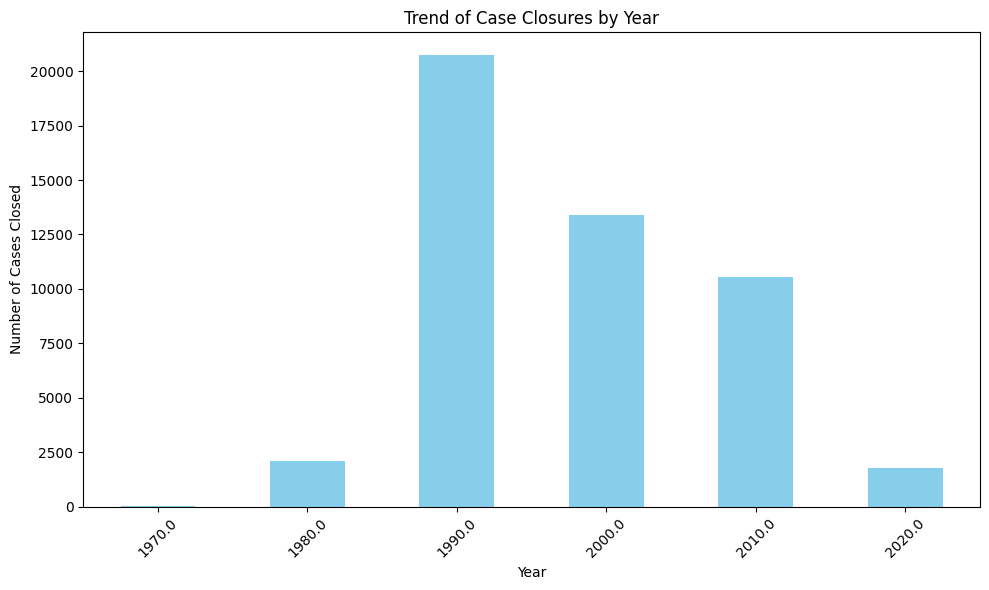

In [47]:
df['NO_FURTHER_ACTION_DATE'] = pd.to_datetime(df['NO_FURTHER_ACTION_DATE'], errors='coerce')

df['closure_year'] = (df['NO_FURTHER_ACTION_DATE'].dt.year// 10) * 10

closures_per_year = df['closure_year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
closures_per_year.plot(kind='bar', color='skyblue')
plt.title('Trend of Case Closures by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases Closed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['NO_FURTHER_ACTION_DATE'].mean

In [ ]:
df['NO_FURTHER_ACTION_DATE']

In [ ]:
df['BEGIN_DATE']

In [ ]:
df['BEGIN_DATE'] = pd.to_datetime(df['BEGIN_DATE'])
df['BEGIN_DATE']


In [ ]:
df['NO_FURTHER_ACTION_DATE']=pd.to_datetime(df['NO_FURTHER_ACTION_DATE'])
df['NO_FURTHER_ACTION_DATE']



In [ ]:
df[['BEGIN_DATE','NO_FURTHER_ACTION_DATE']]

In [ ]:
df['NO_FURTHER_ACTION_DATE'].isnull().sum()

In [ ]:
df['NO_FURTHER_ACTION_DATE']#.str.contains('NaT').sum()

In [ ]:
df = df.dropna(subset=['NO_FURTHER_ACTION_DATE'])
df

In [ ]:
df.loc[:, 'NO_FURTHER_ACTION_DATE'] = pd.to_datetime(df['NO_FURTHER_ACTION_DATE']).dt.strftime('%Y-%m-%d').copy()


In [ ]:
df.loc[:, 'NO_FURTHER_ACTION_DATE'] = pd.to_datetime(df['NO_FURTHER_ACTION_DATE'])#.dt.strftime('%Y-%m-%d')


In [ ]:
df.dtypes

In [ ]:
 df['NO_FURTHER_ACTION_DATE'].dtype

In [ ]:
df['BEGIN_DATE'].dtype

In [ ]:
df['BEGIN_DATE']

In [ ]:
df['NO_FURTHER_ACTION_DATE']  = pd.to_datetime(df['NO_FURTHER_ACTION_DATE'])# - df['BEGIN_DATE']

In [ ]:
df['case_duration_days'] = (df['NO_FURTHER_ACTION_DATE'] - df['BEGIN_DATE']).dt.days

In [ ]:
df['case_duration_days']